# Introduction
This notebook goes from (preprocessed) EEG data extraction to the fit of the HsMM-MVPA model in multiple conditions

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import itertools
import multiprocessing
import os
import mne
import pyhsmm_mvpa as hsmm

cpus = multiprocessing.cpu_count()
print(cpus)

%load_ext autoreload
%autoreload 2


80


# Loading EEG data
Then resample and create epochs (i.e. trial where time 0 is the time at which the stimulus appeared) and store in common xarray file (see https://docs.xarray.dev/en/stable/ for more info on that format)

In [2]:
hsmm.read_mne_EEG#Note the use of filtering and minimum and minimum both for epoch size and RTs, default values will likely not always be a good fit

<function pyhsmm_mvpa.read_mne_EEG(pfiles, event_id, resp_id, sfreq, events=None, resampling=False, tmin=-0.2, tmax=2.2, offset_after_resp=0.1, low_pass=0.5, high_pass=30, upper_limit_RT=2, lower_limit_RT=0.2)>

In [3]:
event_id = {'accuracy/left/1':211,'accuracy/left/2':212,'accuracy/left/3':213,
           'accuracy/right/1':221,'accuracy/right/2':222,'accuracy/right/3':223,
            'speed/left/1':111,'speed/left/2':112,'speed/left/3':113, #conditions in the experiment
           'speed/right/1':121,'speed/right/2':122,'speed/right/3':123} # used for segmentation
resp_id = {'r_left':100,'r_right':200}#Response events
sfreq = 512#For resampling
#cpus = 5 #if not enough RAM to load all participants data, better reduce the number of processes

path = 'preprocessed_data/'
subj_names = [x.split('_')[1].split('.')[0] for x in os.listdir(path) if 'preprocessed' in x]
#subj_names = ['S1', 'S2','S3','S4', 'S5']#subset for the example, remove for analysis
print(subj_names)
subj_files = [path+ 'preprocessed_'+x+'.fif' for x in subj_names]

save_file = 'epoch_data_condition-wise.nc'
if save_file not in os.listdir():#avoids to loop again if notebook is restarted
    with multiprocessing.Pool(processes=cpus) as pool:
        epoch_data = pool.starmap(hsmm.read_mne_EEG, 
                zip([[x] for x in subj_files], itertools.repeat(event_id), itertools.repeat(resp_id),
                    itertools.repeat(sfreq)))
    epoch_data = xr.concat(epoch_data, pd.Series(subj_names, name="participant"))#not sure about the order of the particiapnt use with caution
    epoch_data.to_netcdf(save_file)
    epoch_data = xr.open_dataset(save_file)#For an unknown reason I need to re-read it
else:
    epoch_data = xr.open_dataset(save_file)
cpus = multiprocessing.cpu_count()

raw = mne.io.read_raw_fif(subj_files[0], preload=False, verbose=False)#loading for sensor position


['S8', 'S6', 'S1', 'S18', 'S11', 'S16', 'S7', 'S9', 'S17', 'S10', 'S13', 'S14', 'S4', 'S3', 'S15', 'S12', 'S20', 'S2', 'S5']


/Users/p308410/projects/pyhsmm-mvpa/pyhsmm_mvpa.py:35: RuntimeWarning: This filename (preprocessed_data/preprocessed_S8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)
/Users/p308410/projects/pyhsmm-mvpa/pyhsmm_mvpa.py:35: RuntimeWarning: This filename (preprocessed_data/preprocessed_S18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(participant, preload=False, verbose=False)
/Users/p308410/projects/pyhsmm-mvpa/pyhsmm_mvpa.py:35: RuntimeWarning: This filename (preprocessed_data/preprocessed_S1.fif) does not conform to MNE na

Reading 0 ... 4594687  =      0.000 ...  4486.999 secs...
Reading 0 ... 4537343  =      0.000 ...  4430.999 secs...
Reading 0 ... 4814847  =      0.000 ...  4701.999 secs...
Reading 0 ... 4750335  =      0.000 ...  4638.999 secs...
Reading 0 ... 4689919  =      0.000 ...  4579.999 secs...
Reading 0 ... 5229567  =      0.000 ...  5106.999 secs...
Reading 0 ... 4798463  =      0.000 ...  4685.999 secs...
Reading 0 ... 5106687  =      0.000 ...  4986.999 secs...
Reading 0 ... 4902911  =      0.000 ...  4787.999 secs...
Reading 0 ... 4881407  =      0.000 ...  4766.999 secs...
Downsampling to 512 Hz
Reading 0 ... 5107711  =      0.000 ...  4987.999 secs...
Downsampling to 512 Hz
Reading 0 ... 4573183  =      0.000 ...  4465.999 secs...
Downsampling to 512 Hz
Reading 0 ... 5177343  =      0.000 ...  5055.999 secs...
Reading 0 ... 5602303  =      0.000 ...  5470.999 secs...
Reading 0 ... 6117375  =      0.000 ...  5973.999 secs...
Downsampling to 512 Hz
Reading 0 ... 4797439  =      0.000 ..

/tmp/ipykernel_1048296/1766599735.py:28: RuntimeWarning: This filename (preprocessed_data/preprocessed_S8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(subj_files[0], preload=False, verbose=False)#loading for sensor position


In [4]:
epoch_data

<xarray.Dataset>
Dimensions:      (epochs: 2392, samples: 1023, electrodes: 64, participant: 19)
Coordinates:
  * epochs       (epochs) int32 0 1 2 3 4 5 6 ... 2386 2387 2388 2389 2390 2391
  * samples      (samples) int32 0 1 2 3 4 5 6 ... 1017 1018 1019 1020 1021 1022
  * electrodes   (electrodes) object 'Fp1' 'AF7' 'AF3' 'F1' ... 'PO8' 'PO4' 'O2'
  * participant  (participant) object 'S8' 'S6' 'S1' 'S18' ... 'S20' 'S2' 'S5'
Data variables:
    data         (participant, epochs, electrodes, samples) float64 ...
    event        (participant, epochs) object ...
Attributes:
    sfreq:    512.0

# Applying HsMM for the speed condition

Initializing data for the speed condition

In [5]:
subset = epoch_data.where(epoch_data.event.str.contains('speed'),drop=True)
hsmm_speed_data = hsmm.transform_data(subset,\
                           'participant',stack=True,return_weights=True)
init_speed = hsmm.hsmm(hsmm_speed_data.data.T, hsmm_speed_data.starts.data, hsmm_speed_data.ends.data, 
                       sf=epoch_data.sfreq, cpus=cpus)

Estimating the different number of bump solution using the backward estimation (first estimate max_bump solution then estimate max_bump - 1 solution by iteratively removing one of the bump and pick the one with the highest likelihood)

In [6]:
file_to_save = 'bests_speed.nc'

if file_to_save not in os.listdir():
    bests_speed = init_speed.backward_estimation()
    bests_speed.to_netcdf(file_to_save)
else:
    bests_speed = xr.open_dataset(file_to_save)
    print('recovering previous estimation')
bests_speed

Estimating parameters for 4 bumps model


/Users/p308410/projects/pyhsmm-mvpa/pyhsmm_mvpa.py:398: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/Users/p308410/projects/pyhsmm-mvpa/pyhsmm_mvpa.py:404: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 4 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 3 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 3 bumps model
Estimating parameters for 2 bumps model
Estimating parameters for 2 bumps model
Estimating parameters for 2 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 2 bumps model
Estimating parameters for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Parameters estimated for 1 bumps model


<xarray.Dataset>
Dimensions:      (n_bumps: 4, stage: 5, params: 2, component: 10, bump: 4, samples: 986, trial: 20936)
Coordinates:
  * n_bumps      (n_bumps) int64 4 3 2 1
Dimensions without coordinates: stage, params, component, bump, samples, trial
Data variables:
    likelihoods  (n_bumps) float64 -1.415e+05 -1.12e+05 -1.108e+05 -1.143e+05
    parameters   (n_bumps, stage, params) float64 2.0 14.33 2.0 ... nan nan nan
    magnitudes   (n_bumps, component, bump) float64 -0.589 0.512 ... nan nan
    eventprobs   (n_bumps, samples, trial, bump) float64 0.0 0.0 0.0 ... nan nan

## Plotting the bump placement from this method

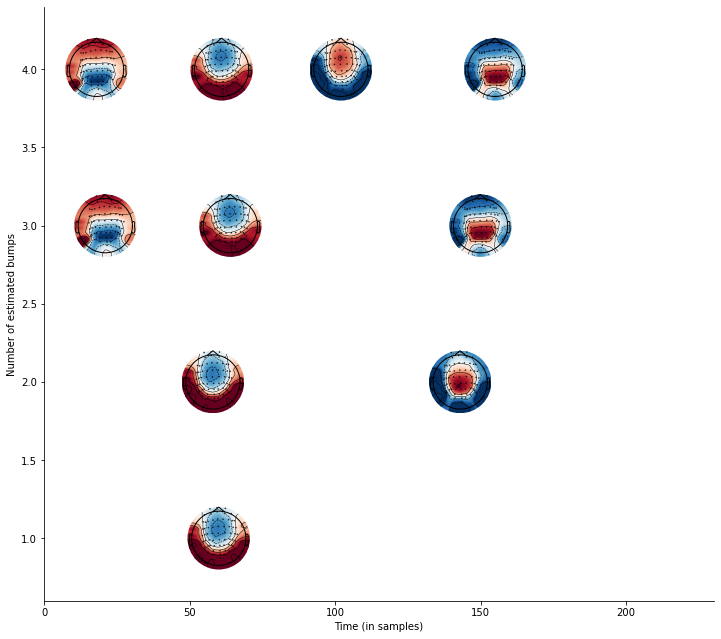

In [13]:
hsmm.plot_topo_timecourse(init_speed, hsmm_speed_data, bests_speed, raw, magnify=1, figsize=(12,10))

In [14]:
file_to_save = 'all_n_bumps_speed.nc'

temp = hsmm_speed_data.unstack().data
bests = bests_speed
init = init_speed

if file_to_save not in os.listdir():
    subjects_idx = epoch_data.participant.values
    likelihoods_loo = []
    cpus= multiprocessing.cpu_count()
    all_n_bumps = []
    for n_bumps in np.arange(1,init_speed.max_bumps+1):    
        with multiprocessing.Pool(processes=cpus) as pool:
            loo = pool.starmap(hsmm.LOOCV, 
                zip(itertools.repeat(temp),subjects_idx, itertools.repeat(n_bumps), 
                    itertools.repeat(bests.sel(n_bumps=n_bumps)), itertools.repeat(epoch_data.sfreq)))
        all_n_bumps.append(loo)

    loocv = xr.DataArray(np.array(all_n_bumps)[:,:,0].astype(np.float64), coords={"n_bump":np.arange(1,init_speed.max_bumps+1),
                                                               "participants":np.array(all_n_bumps)[0,:,1]})

    loocv.to_netcdf(file_to_save)
    
loocv_speed = xr.open_dataset(file_to_save)
loocv_speed

Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters e

<xarray.Dataset>
Dimensions:                        (participants: 19, n_bump: 4)
Coordinates:
  * participants                   (participants) object 'S8' 'S6' ... 'S2' 'S5'
  * n_bump                         (n_bump) int32 1 2 3 4
Data variables:
    __xarray_dataarray_variable__  (n_bump, participants) float64 ...

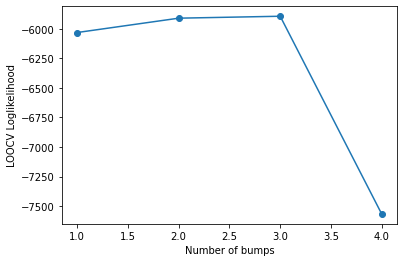

In [15]:
plt.plot(np.arange(init_speed.max_bumps)+1,np.mean(loocv_speed.__xarray_dataarray_variable__,axis=1),'o-')
plt.ylabel('LOOCV Loglikelihood')
plt.xlabel('Number of bumps');

# Applying HsMM for the accuracy condition

Initializing data for the accuracy condition

In [16]:
subset = epoch_data.where(epoch_data.event.str.contains('accuracy'),drop=True)
hsmm_accuracy_data = hsmm.transform_data(subset,'participant',stack=True,return_weights=True)
init_accuracy = hsmm.hsmm(hsmm_accuracy_data.data.T, hsmm_accuracy_data.starts.data, hsmm_accuracy_data.ends.data, 
                       sf=epoch_data.sfreq, cpus=cpus)

In [17]:
init_accuracy = hsmm.hsmm(hsmm_accuracy_data.data.T, hsmm_accuracy_data.starts.data, hsmm_accuracy_data.ends.data, 
                       sf=epoch_data.sfreq, cpus=cpus)

Estimating the different number of bump solution using the backward estimation (first estimate max_bump solution then estimate max_bump - 1 solution by iteratively removing one of the bump and pick the one with the highest likelihood)

In [18]:
file_to_save = 'bests_accuracy.nc'

if file_to_save not in os.listdir():
    bests_accuracy = init_accuracy.backward_estimation()
    bests_accuracy.to_netcdf(file_to_save)
else:
    bests_accuracy = xr.open_dataset(file_to_save)
    print('recovering previous estimation')
bests_accuracy

Estimating parameters for 4 bumps model


/Users/p308410/projects/pyhsmm-mvpa/pyhsmm_mvpa.py:398: UserWarning: Using default parameters value for gamma parameters
  warnings.warn('Using default parameters value for gamma parameters')
/Users/p308410/projects/pyhsmm-mvpa/pyhsmm_mvpa.py:404: UserWarning: Using default parameters value for magnitudes
  warnings.warn('Using default parameters value for magnitudes')


Parameters estimated for 4 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 3 bumps model
Estimating parameters for 3 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 3 bumps model
Parameters estimated for 3 bumps model
Estimating parameters for 2 bumps model
Estimating parameters for 2 bumps model
Estimating parameters for 2 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 2 bumps model
Parameters estimated for 2 bumps model
Estimating parameters for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Parameters estimated for 1 bumps model


<xarray.Dataset>
Dimensions:      (n_bumps: 4, stage: 5, params: 2, component: 10, bump: 4, samples: 1023, trial: 20928)
Coordinates:
  * n_bumps      (n_bumps) int64 4 3 2 1
Dimensions without coordinates: stage, params, component, bump, samples, trial
Data variables:
    likelihoods  (n_bumps) float64 -1.293e+05 -1.172e+05 -1.179e+05 -1.227e+05
    parameters   (n_bumps, stage, params) float64 2.0 27.35 2.0 ... nan nan nan
    magnitudes   (n_bumps, component, bump) float64 -0.002098 -0.2939 ... nan
    eventprobs   (n_bumps, samples, trial, bump) float64 0.0 0.0 0.0 ... nan nan

## Plotting the bump placement from this method

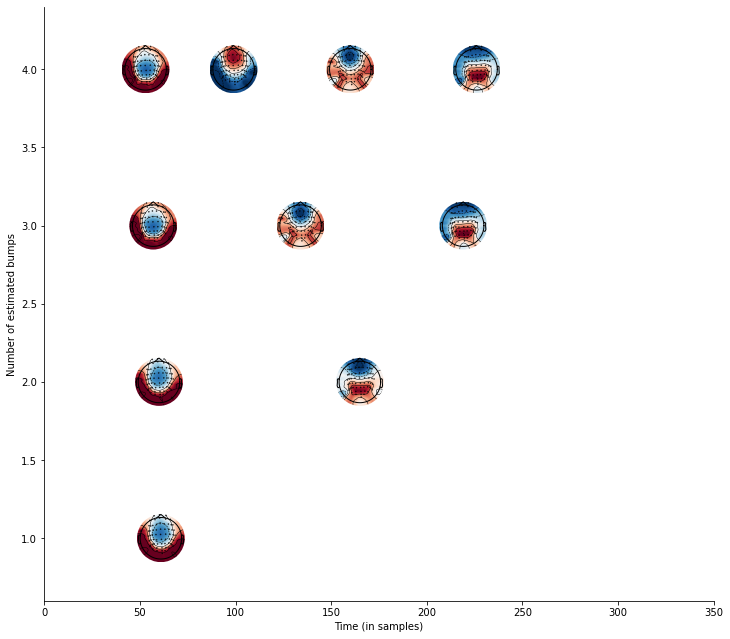

In [19]:
hsmm.plot_topo_timecourse(init_accuracy, hsmm_accuracy_data, bests_accuracy, raw, magnify=1, figsize=(12,10))

In [20]:
file_to_save = 'all_n_bumps_accuracy.nc'

temp = hsmm_accuracy_data.unstack().data
bests = bests_accuracy
init = init_accuracy

if file_to_save not in os.listdir():
    subjects_idx = epoch_data.participant.values
    likelihoods_loo = []
    cpus=5
    all_n_bumps = []
    for n_bumps in np.arange(1,init_speed.max_bumps+1):    
        with multiprocessing.Pool(processes=cpus) as pool:
            loo = pool.starmap(hsmm.LOOCV, 
                zip(itertools.repeat(temp),subjects_idx, itertools.repeat(n_bumps), 
                    itertools.repeat(bests.sel(n_bumps=n_bumps)), itertools.repeat(epoch_data.sfreq)))
        all_n_bumps.append(loo)

    loocv = xr.DataArray(np.array(all_n_bumps)[:,:,0].astype(np.float64), coords={"n_bump":np.arange(1,init_speed.max_bumps+1),
                                                               "participants":np.array(all_n_bumps)[0,:,1]})

    loocv.to_netcdf(file_to_save)
    
loocv_accuracy = xr.open_dataset(file_to_save)
loocv_accuracy

Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Parameters estimated for 1 bumps model
Estimating parameters for 1 bumps model
Estimating parameters for 1 bumps model
Parameters estimated for 1 bumps model
Estimating p

<xarray.Dataset>
Dimensions:                        (participants: 19, n_bump: 4)
Coordinates:
  * participants                   (participants) object 'S8' 'S6' ... 'S2' 'S5'
  * n_bump                         (n_bump) int32 1 2 3 4
Data variables:
    __xarray_dataarray_variable__  (n_bump, participants) float64 ...

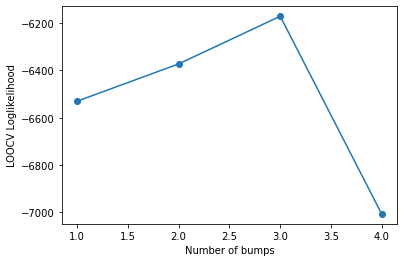

In [21]:
plt.plot(np.arange(init_accuracy.max_bumps)+1,np.mean(loocv_accuracy.__xarray_dataarray_variable__,axis=1),'o-')
plt.ylabel('LOOCV Loglikelihood')
plt.xlabel('Number of bumps');

# Inspecting best model

In [22]:
estimates_speed = bests_speed.sel(n_bumps=3).drop_vars('n_bumps')
estimates_accuracy = bests_accuracy.sel(n_bumps=3).drop_vars('n_bumps')

### Bump probabilities

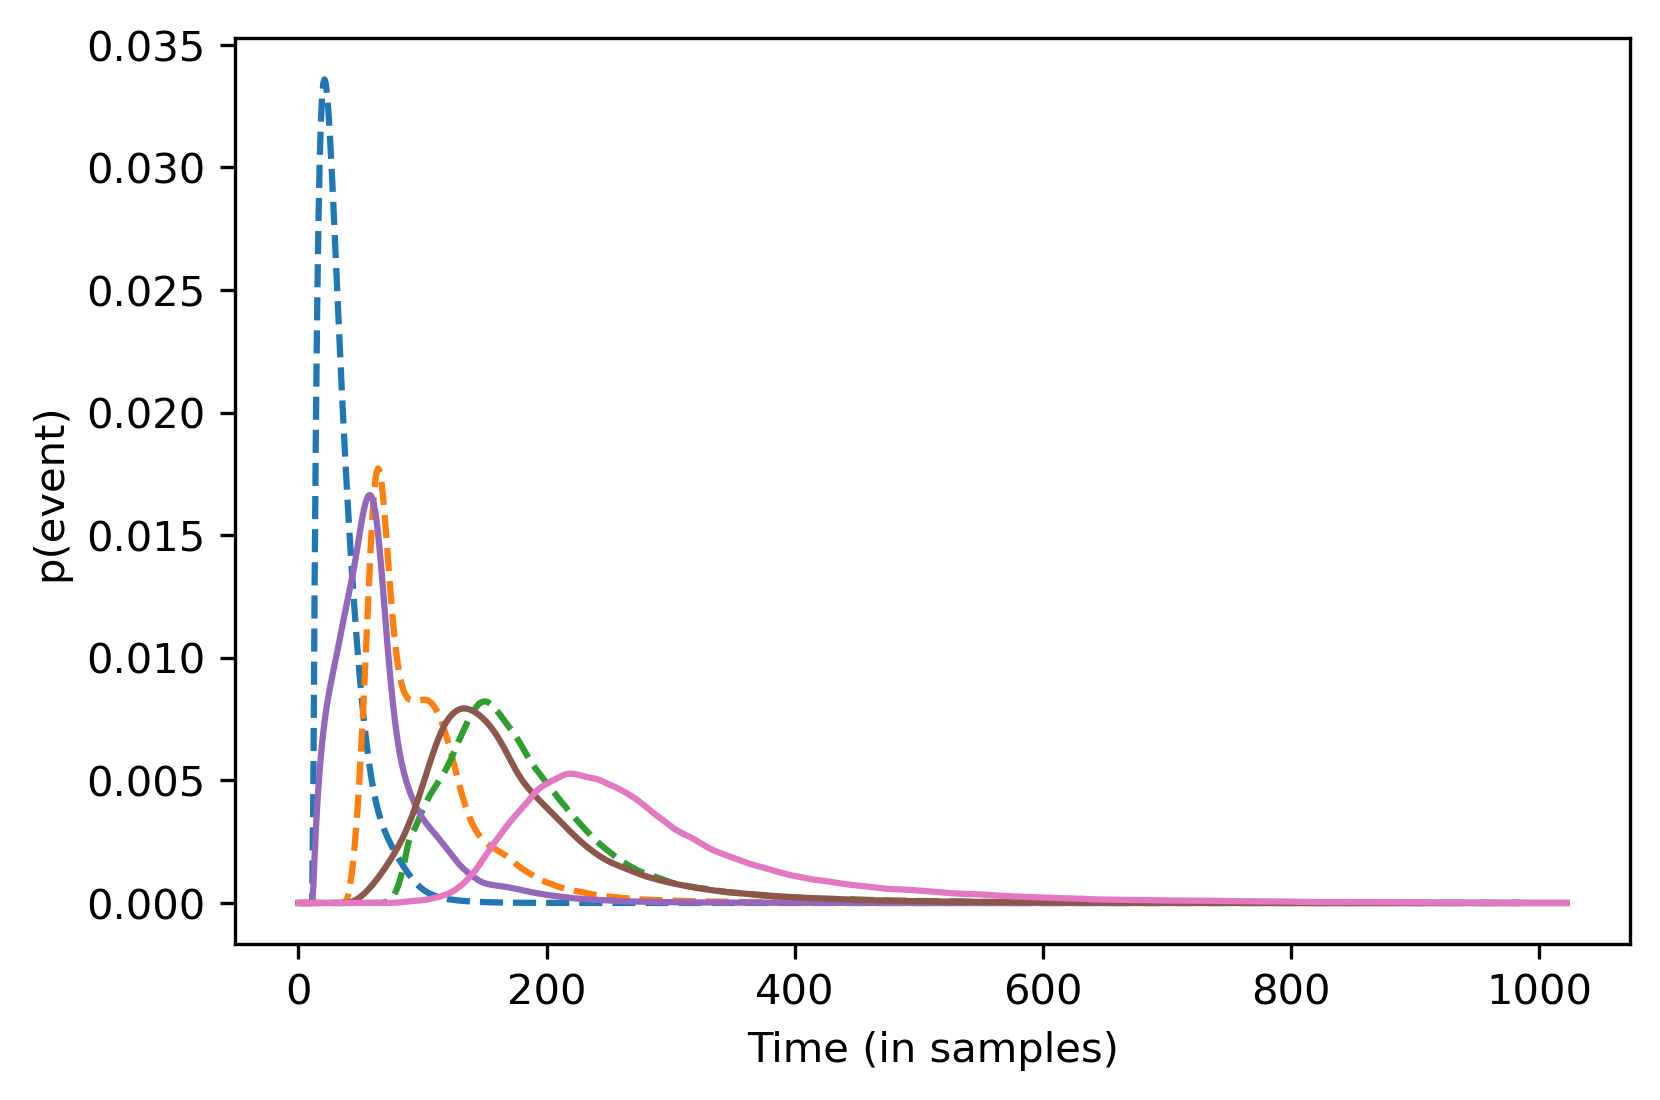

In [33]:
plt.figure(dpi=300)
plt.plot(estimates_speed.eventprobs.mean(dim=['trial']).sel(bump=[0,1,2,3]),'--')
plt.plot(estimates_accuracy.eventprobs.mean(dim=['trial']).sel(bump=[0,1,2,3]))
plt.ylabel('p(event)')
plt.xlabel('Time (in samples)');

### Gamma distribution of stages

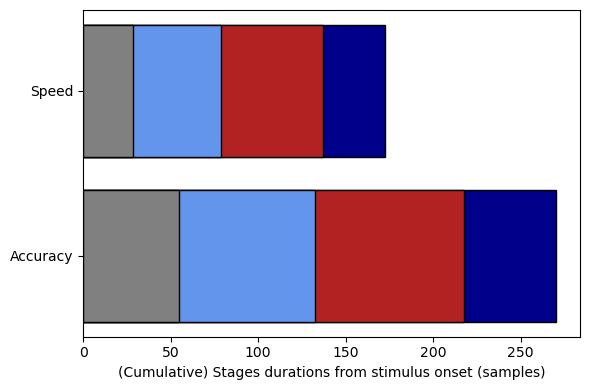

In [24]:
f, axs = plt.subplots(1,1, figsize=(6, 4),sharey=True, sharex=False,dpi=100)

cond = ['Speed', 'Accuracy']
color_code = ['gray','cornflowerblue','firebrick','darkblue']
stages_accuracy = estimates_accuracy.parameters.isel(params=0).dropna('stage') * estimates_accuracy.parameters.isel(params=1).dropna('stage')
stages_speed = estimates_speed.parameters.isel(params=0).dropna('stage') * estimates_speed.parameters.isel(params=1).dropna('stage')

j = 0
for i in np.arange(len(stages_speed),0,-1):
    plt.barh(-.5, stages_accuracy[:i].sum(), color=color_code[i-1], edgecolor='k')
    plt.barh(.5, stages_speed[:i].sum(), color=color_code[i-1], edgecolor='k')
    j-=1
plt.yticks([.5,-.5],["Speed","Accuracy"])
plt.xlabel('(Cumulative) Stages durations from stimulus onset (samples)')
plt.tight_layout()
plt.show()

### Topography of bumps

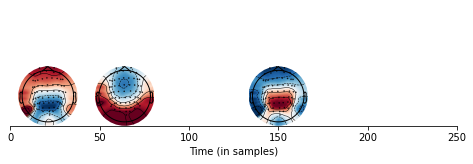

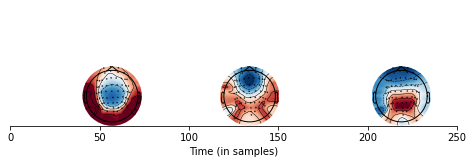

In [32]:
hsmm.plot_topo_timecourse(init, hsmm_speed_data, estimates_speed, raw, magnify=2, figsize=(8,2), max_time=250)
hsmm.plot_topo_timecourse(init, hsmm_accuracy_data, estimates_accuracy, raw, magnify=2, figsize=(8,2), max_time=250)